In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("dark_background")

## Data Load & EDA

In [2]:
df = pd.read_csv('bmw.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [3]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [4]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000,10781.000000
mean,2017.078935,22733.408867,25496.986550,131.702068,56.399035,2.167767
std,2.349038,11415.528189,25143.192559,61.510755,31.336958,0.552054
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5529.000000,135.000000,45.600000,2.000000
50%,2017.000000,20462.000000,18347.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.000000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [5]:
df = df[df['price']<123456]
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [6]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000,10780.000000
mean,2017.079128,22724.065399,25496.251670,131.712430,56.397876,2.167783
std,2.349062,11374.757162,25144.243049,61.504198,31.338180,0.552077
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14950.000000,5528.500000,135.000000,45.600000,2.000000
50%,2017.000000,20461.000000,18345.000000,145.000000,53.300000,2.000000
75%,2019.000000,27940.000000,38206.750000,145.000000,62.800000,2.000000
max,2020.000000,99950.000000,214000.000000,580.000000,470.800000,6.600000


In [7]:
df['year'].value_counts()

2019    3485
2016    1882
2017    1721
2015     921
2018     848
2020     733
2014     501
2013     357
2012     119
2011      51
2010      41
2009      30
2008      23
2007      16
2006      14
2004      12
2002       6
2005       6
1999       4
2001       3
2000       2
2003       2
1998       1
1997       1
1996       1
Name: year, dtype: int64

In [8]:
df_cat = df[['model', 'year', 'transmission', 'fuelType']]
df_cat.head()

,model,year,transmission,fuelType
0,5 Series,2014,Automatic,Diesel
1,6 Series,2018,Automatic,Petrol
2,5 Series,2016,Automatic,Diesel
3,1 Series,2017,Automatic,Diesel
4,7 Series,2014,Automatic,Diesel


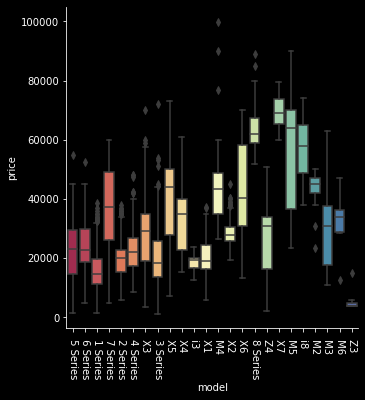

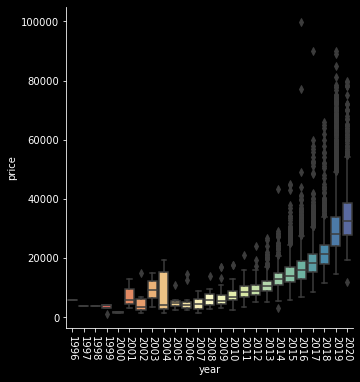

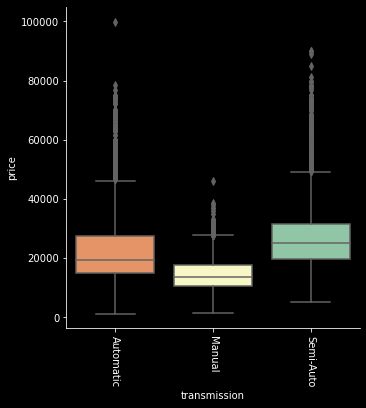

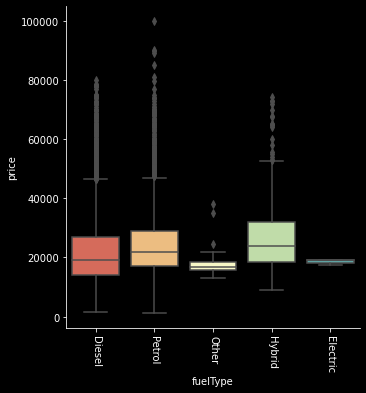

In [9]:
for i in df_cat.columns:
    sns.catplot(x=i, y=df["price"], kind="box", palette="Spectral", data= df_cat)
    plt.xticks(rotation=-90)
    plt.show()

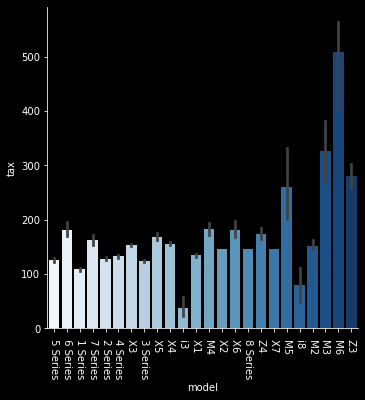

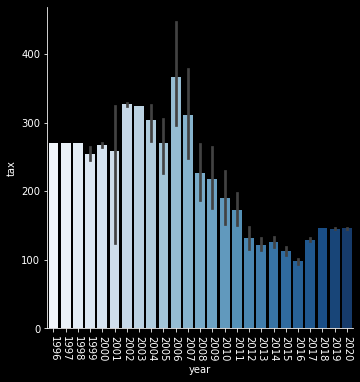

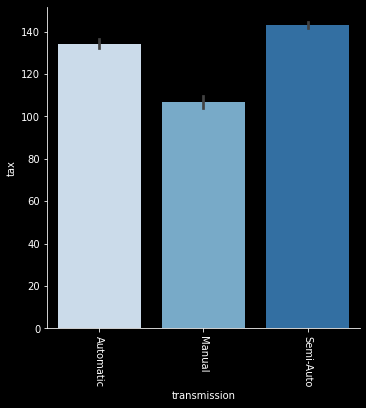

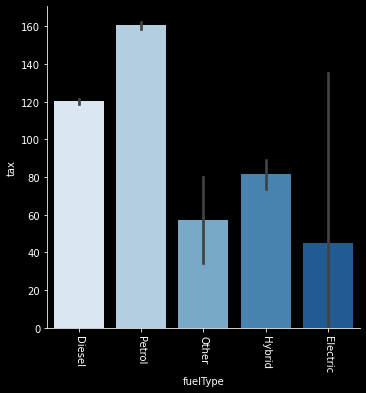

In [10]:
for i in df_cat.columns:
    sns.catplot(x=i, y=df["tax"], kind="bar", palette="Blues", data= df_cat)
    plt.xticks(rotation=-90)
    plt.show()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'price'}>],
       [<AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'tax'}>],
       [<AxesSubplot:title={'center':'mpg'}>,
        <AxesSubplot:title={'center':'engineSize'}>]], dtype=object)

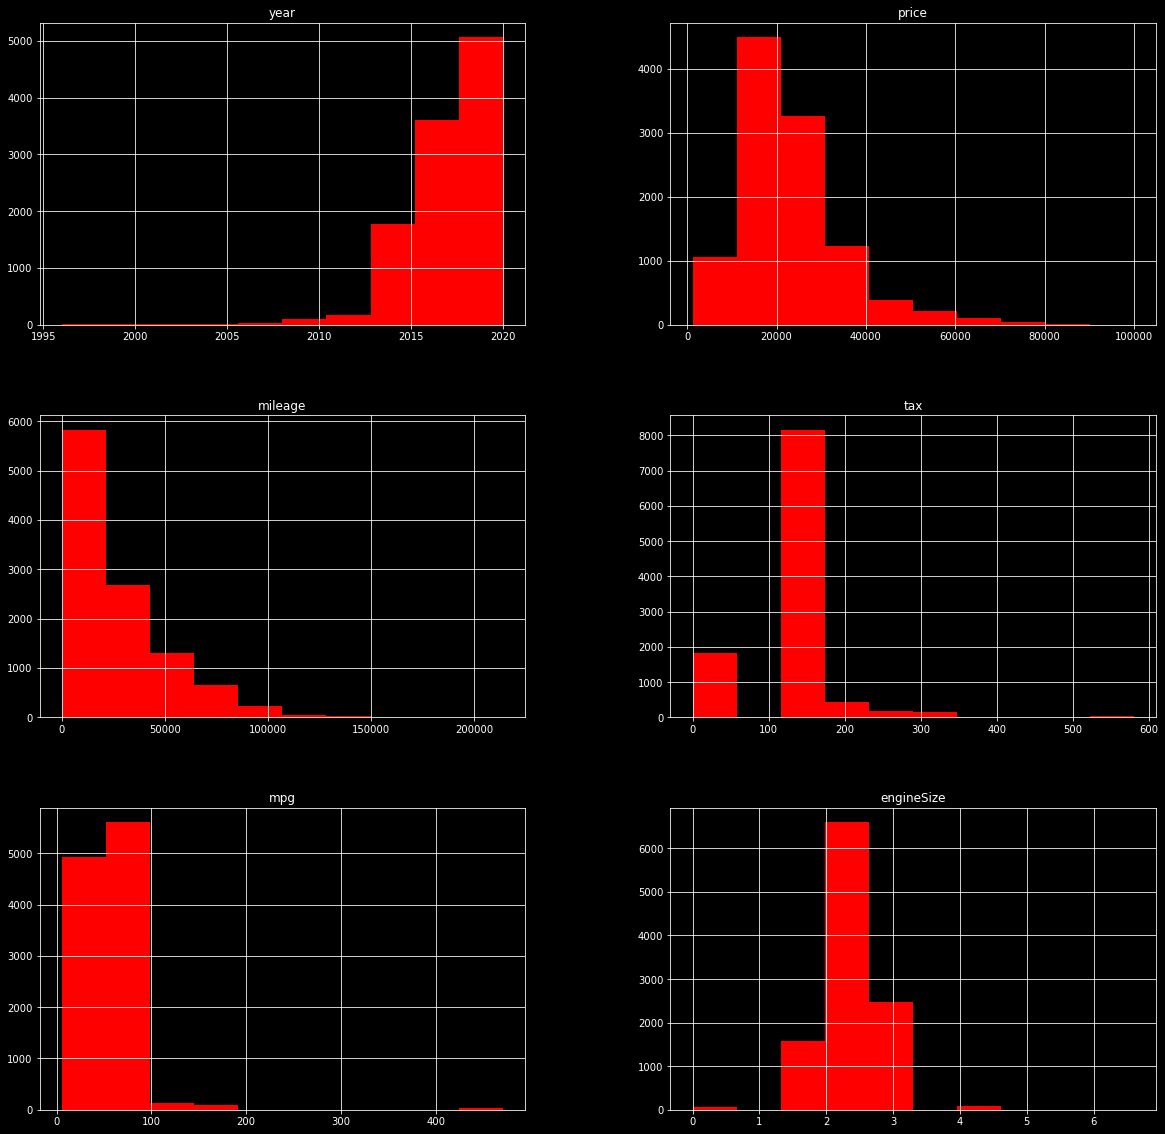

In [11]:
df.hist(figsize=(20,20), color = 'red')

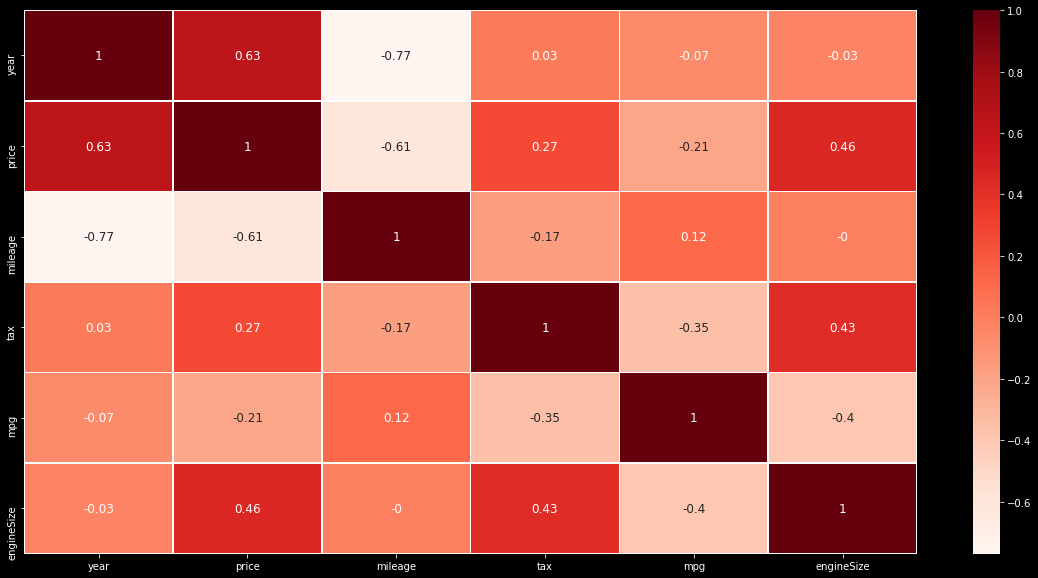

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(data=df.corr().round(2), linewidths=.5, annot=True, annot_kws={"size":12}, cmap = 'Reds')
plt.show()

## Data Preparation & Regression

In [13]:
df_num = df[['year', 'price', 'mileage','tax', 'mpg', 'engineSize']]
df_num

,year,price,mileage,tax,mpg,engineSize
0,2014,11200,67068,125,57.6,2.0
1,2018,27000,14827,145,42.8,2.0
2,2016,16000,62794,160,51.4,3.0
3,2017,12750,26676,145,72.4,1.5
4,2014,14500,39554,160,50.4,3.0
...,...,...,...,...,...,...
10776,2016,19000,40818,150,54.3,2.0
10777,2016,14600,42947,125,60.1,2.0
10778,2017,13100,25468,200,42.8,2.0
10779,2014,9930,45000,30,64.2,2.0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns)
df_scaled.head()

,year,price,mileage,tax,mpg,engineSize
0,-1.310851,-1.013173,1.653407,-0.109143,0.038362,-0.303926
1,0.392035,0.375932,-0.424342,0.216053,-0.433928,-0.303926
2,-0.459408,-0.591167,1.483420,0.459950,-0.159489,1.507499
3,-0.033687,-0.876900,0.046921,0.216053,0.510651,-1.209639
4,-1.310851,-0.723044,0.559110,0.459950,-0.191401,1.507499


In [15]:
X = df_scaled.drop(['price'], axis = 1)
y = df['price']

X.head()

,year,mileage,tax,mpg,engineSize
0,-1.310851,1.653407,-0.109143,0.038362,-0.303926
1,0.392035,-0.424342,0.216053,-0.433928,-0.303926
2,-0.459408,1.483420,0.459950,-0.159489,1.507499
3,-0.033687,0.046921,0.216053,0.510651,-1.209639
4,-1.310851,0.559110,0.459950,-0.191401,1.507499


In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                   test_size = 0.30)
print(X_train.shape, X_test.shape)

(7546, 5) (3234, 5)


In [17]:
from sklearn.model_selection import GridSearchCV

def gs_regression(model, par) :
    gs = GridSearchCV(model, par,cv=3,scoring ='neg_mean_absolute_error') 
    gs = gs.fit(X_train,y_train)

    #summarize the results of your GRIDSEARCH
    print('***GRIDSEARCH RESULTS***')
    print("Best score: %f using %s" % (gs.best_score_, gs.best_params_))
    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    params = gs.cv_results_['params']
    #for mean, stdev, param in zip(means, stds, params):
    #    print("%f (%f) with: %r" % (mean, stdev, param))
    
    y_pred_train=gs.predict(X_train)
    y_pred_test=gs.predict(X_test) 
        
    from sklearn import metrics
    print()
    print("MAE  train %.3f    test %06.3f" % (metrics.mean_absolute_error(y_train, y_pred_train), metrics.mean_absolute_error(y_test, y_pred_test) ) )
    print("MSE  train %.3f test %.3f" % (metrics.mean_squared_error(y_train, y_pred_train), metrics.mean_squared_error(y_test, y_pred_test)) ) 
    print("RMSE train %.3f   test %.3f" % (np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)), np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))) ) 
    print("r2   train %.3f     test %.3f" % (metrics.r2_score(y_train, y_pred_train), metrics.r2_score(y_test, y_pred_test)) )

In [18]:
from sklearn.neighbors import KNeighborsRegressor

regressor = KNeighborsRegressor()

parameters = {'n_neighbors': np.arange(10,20),
              'p': [1,2]
            }

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -2820.949253 using {'n_neighbors': 10, 'p': 1}

MAE  train 2429.991    test 2611.752
MSE  train 14871241.306 test 17616541.990
RMSE train 3856.325   test 4197.206
r2   train 0.888     test 0.856


In [19]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression() 
parameters = {}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -4558.685448 using {}

MAE  train 4548.365    test 4508.072
MSE  train 45206284.362 test 42916641.596
RMSE train 6723.562   test 6551.079
r2   train 0.658     test 0.650


In [20]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor()
parameters = {"max_depth": np.arange(1,8), 
              "min_samples_leaf": np.arange(5,20),
              "min_samples_split" : np.arange(5,10)}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -3045.864374 using {'max_depth': 7, 'min_samples_leaf': 6, 'min_samples_split': 6}

MAE  train 2841.141    test 2977.306
MSE  train 17242285.343 test 19451281.592
RMSE train 4152.383   test 4410.361
r2   train 0.870     test 0.841


In [23]:
from sklearn.ensemble import RandomForestRegressor 

regressor = RandomForestRegressor()
parameters = {"n_estimators":np.arange(10,20),
              "min_samples_leaf": np.arange(5,20),
              "min_samples_split": np.arange(5,10)}

gs_regression(regressor, parameters)

***GRIDSEARCH RESULTS***
Best score: -2534.617136 using {'min_samples_leaf': 5, 'min_samples_split': 7, 'n_estimators': 16}

MAE  train 1905.666    test 2335.155
MSE  train 9917490.351 test 14156177.737
RMSE train 3149.205   test 3762.470
r2   train 0.925     test 0.884
